<a href="https://colab.research.google.com/github/YeonJungHoon/NLP-/blob/main/Step15th(Spam_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pprint import pprint

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding = 'latin1')
print("총 샘플의 수: {}".format(len(data)))

총 샘플의 수: 5572


In [2]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

data['v1'] = data['v1'].replace(['ham', 'spam'], [0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [5]:
print("결측값 여부: {}".format(data.isnull().values.any()))

결측값 여부: False


In [7]:
print("v2열의 유니크한 값: {}".format(data['v2'].nunique()))

v2열의 유니크한 값: 5169


In [9]:
data.drop_duplicates(subset = ['v2'], inplace = True)
print('총 샘플의 수: {}'.format(len(data)))

총 샘플의 수: 5169


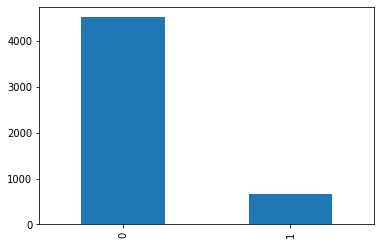

In [10]:
data['v1'].value_counts().plot(kind = 'bar')


In [11]:
print("정상 메일과 스팸 메일의 개수")
print(data.groupby('v1').size().reset_index(name = 'count'))


정상 메일과 스팸 메일의 개수
   v1  count
0   0   4516
1   1    653


In [13]:
X_data = data['v2']
y_data = data['v1']
print("메일 본문의 개수: {}".format(len(X_data)))
print("레이블의 개수: {}".format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0, stratify = y_data)

In [15]:
print('--------훈련 데이터의 비율-----------')
print(f'정상 메일 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'스팸 메일 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
정상 메일 = 87.376%
스팸 메일 = 12.624%


In [34]:
print('--------테스트 데이터의 비율-----------')
print(f'정상 메일 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%') #round 함수로 소수점 3번째 자리까지 반올림
print(f'스팸 메일 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
정상 메일 = 87.331%
스팸 메일 = 12.669%


In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407]]


In [22]:
word_to_index = tokenizer.word_index
pprint(word_to_index)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 'few': 311,
 'ffectionate': 7331,
 'fffff': 5691,
 'ffffffffff': 6524,
 'ffffuuuuuuu': 7070,
 'fgkslpo': 4264,
 'fgkslpopw': 4263,
 'fidalfication': 5134,
 'field': 2692,
 'fiend': 6997,
 'fifa': 5531,
 'fifteen': 1757,
 'fifth': 5603,
 'fifty': 5419,
 'fight': 2532,
 'fighting': 2096,
 'fightng': 7741,
 'fights': 3291,
 'figure': 935,
 'figures': 2413,
 'file': 2136,
 'files': 1936,
 'fill': 1820,
 'filled': 4889,
 'filling': 5268,
 'film': 962,
 'films': 2110,
 'filth': 6694,
 'filthy': 2802,
 'filthyguys': 5024,
 'final': 841,
 'finalise': 6918,
 'finally': 730,
 'finance': 2475,
 'find': 179,
 'finding': 3551,
 'fine': 277,
 'finest': 4184,
 'fingers': 1618,
 'finish': 257,
 'finishd': 7525,
 'finished': 540,
 'finishes': 1829,
 'finishing': 1919,
 "finn's": 4072,
 'fire': 5729,
 'fired': 6170,
 'fires': 7601,
 'firmware': 6114,
 'first': 200,
 'fish': 2744,
 'fishrman': 5359,
 'fit': 3133,
 'fiting': 5290,
 'five': 1468,
 'fix': 2037,
 'fixed':

In [23]:
threshold = 2
total_cnt = len(word_to_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  if (value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4337
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.45326684567191
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.65745644331875


In [27]:
vocab_size = len(word_to_index) +1
print('단어 집합의 크기: {}'.format(vocab_size))


단어 집합의 크기: 7822


메일의 최대 길이 : 189
메일의 평균 길이 : 15.754534


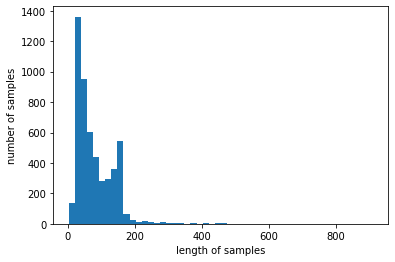

In [28]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [29]:
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (4135, 189)


In [30]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 5s 64ms/step - loss: 0.3210 - acc: 0.8927 - val_loss: 0.1433 - val_acc: 0.9625
Epoch 2/4
52/52 [==============================] - 4s 86ms/step - loss: 0.0938 - acc: 0.9749 - val_loss: 0.1722 - val_acc: 0.9335
Epoch 3/4
52/52 [==============================] - 4s 69ms/step - loss: 0.0525 - acc: 0.9855 - val_loss: 0.0608 - val_acc: 0.9819
Epoch 4/4
52/52 [==============================] - 4s 85ms/step - loss: 0.0469 - acc: 0.9852 - val_loss: 0.0800 - val_acc: 0.9758


In [31]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 0s 11ms/step - loss: 0.1080 - acc: 0.9671

 테스트 정확도: 0.9671


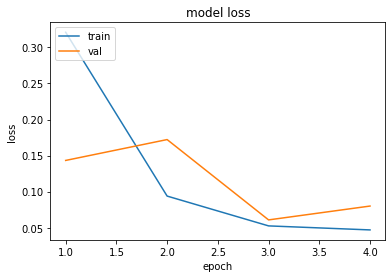

In [33]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()